In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import utils
import pandas as pd
import matplotlib.pyplot as plt
from keras.datasets import cifar10

In [2]:
num_classes = 10
input_shape = (32, 32, 3)
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

170498071/170498071 [==============================] - 4s 0us/step


In [3]:
print(x_train.shape,x_test.shape)

(50000, 32, 32, 3) (10000, 32, 32, 3)


In [4]:
plt.imshow?

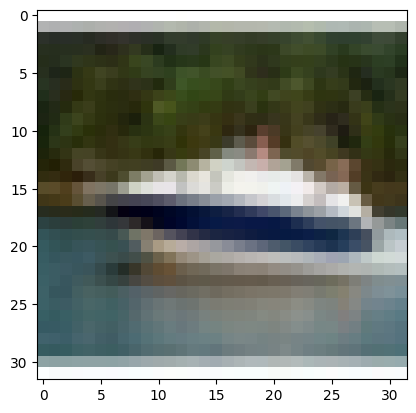

In [5]:
test = x_train[1300]
plt.imshow(test)
plt.show()

In [6]:
x_train = x_train.astype("float32")/255
x_test = x_test.astype("float32")/255


In [7]:
print("x_train shape: ", x_train.shape)
print(x_train.shape[0], " - Train samples")
print(x_test.shape[0], " - Test samples")

x_train shape:  (50000, 32, 32, 3)
50000  - Train samples
10000  - Test samples


In [ ]:
print(y_train)

In [9]:
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [10]:
y_train[10]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [13]:
model = keras.Sequential(
    [
     keras.Input(shape = input_shape),
     layers.Conv2D(32, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(64, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Conv2D(512, kernel_size=(3,3), activation = "relu"),
     layers.MaxPooling2D(pool_size = (2, 2)),
     layers.Flatten(),
     layers.Dropout(0.5),
     layers.Dense(num_classes, activation="softmax")
    ]
)

In [14]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 30, 30, 32)        896       
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 15, 15, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 13, 13, 64)        18496     
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 6, 6, 64)         0         
 2D)                                                             
                                                                 
 conv2d_10 (Conv2D)          (None, 4, 4, 512)         295424    
                                                                 
 max_pooling2d_10 (MaxPoolin  (None, 2, 2, 512)       

In [15]:
batch_size = 128
epochs = 20

In [16]:
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [17]:
model.fit(x_train, y_train, batch_size=batch_size, epochs = epochs, validation_split=0.1)

Epoch 1/20
352/352 [==============================] - 16s 10ms/step - loss: 1.6786 - accuracy: 0.3868 - val_loss: 1.3841 - val_accuracy: 0.4966
Epoch 2/20
352/352 [==============================] - 3s 8ms/step - loss: 1.3343 - accuracy: 0.5251 - val_loss: 1.2439 - val_accuracy: 0.5498
Epoch 3/20
352/352 [==============================] - 2s 7ms/step - loss: 1.1761 - accuracy: 0.5845 - val_loss: 1.0675 - val_accuracy: 0.6288
Epoch 4/20
352/352 [==============================] - 2s 7ms/step - loss: 1.0712 - accuracy: 0.6283 - val_loss: 0.9690 - val_accuracy: 0.6610
Epoch 5/20
352/352 [==============================] - 3s 7ms/step - loss: 0.9900 - accuracy: 0.6549 - val_loss: 0.9765 - val_accuracy: 0.6638
Epoch 6/20
352/352 [==============================] - 3s 7ms/step - loss: 0.9295 - accuracy: 0.6774 - val_loss: 0.8557 - val_accuracy: 0.7034
Epoch 7/20
352/352 [==============================] - 2s 7ms/step - loss: 0.8824 - accuracy: 0.6941 - val_loss: 0.8500 - val_accuracy: 0.7070
Epoc

In [18]:
score = model.evaluate(x_test, y_test, verbose=0)
print("Test loss: ", score[0])
print("Test accuracy: ", score[1])

Test loss:  0.7156504392623901
Test accuracy:  0.7584999799728394
